# Deliverable: NLP With Hotel Review <a id='Top'></a>

This notebook was created during the BrainStation Data Science Bootcamp. It is one of several deliverables. The focus of this notebook is to explore and learn about Machine Learning techniques.

***

### Table of contents 
- [Part 0: Introduction to the problem and  Import required Python packages and import data](#Part-0)

- [Part 1: Exploratory Data Analysis](#Part-1)
    - [Data Exploration and Cleaning](#Part-1.1)
    - [Data Dictionary](#Part-1.2)
    - [Data Plotting and first Insights](#Part-1.3)
    - [Statistical Analysis](#Part-1.4)

- [Part 2: Preprocessing](#Part-2)
    - [Train and Test Split](#Part-2.1)
    - [Tokenization](#Part-2.2)
    - [Merging](#Part-2.3)

- [Part 3: Modelling](#Part-3)
    - [Scaling](#Part-3.0)
    - [Logistic Regression](#Part-3.1)
    - [PCA and Decision Tree](#Part-3.2)
- [Part 4: Model Evaluation](#Part-4)

### Part 0: Introduction to the problem and  Import required Python packages and import data <a class = "anchor" id = "Part-0"></a>

We are tasked with helping Hotel Management Inc. better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. For this analysis, we are provided with a large data set consisting of hotel reviews (text fields for positive and negative comments) and details about the stay (hotel location, time & length of stay, etc).

In [92]:
#Import required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree #For plotting Decision Trees

#Model Optimization
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

#Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#for calculating runtime
import time

In [2]:
#Import data

df_raw = pd.read_csv("data/Hotel_Reviews.csv") 

In [3]:
#Check the size of the dataframe

df_raw.shape

(515738, 30)

***
***
***

[Back to top](#Top)

### Part 1: Exploratory Data Analysis <a class = "anchor" id = "Part-1"></a>
#### Data  Exploration and Cleaning  <a class = "anchor" id = "Part-1.1"></a>


In [4]:
#View first lines of data

df_raw.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


In [5]:
#View column names and their respective data types

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

We have a (raw) dataframe consisting of 30 columns and 515738 rows of data. At first glance, it seems like Hotel Management Inc. owns several hotels in different cities around the world and collects hotel review through a central platform. Each row of the data likely represents one review for one specific hotel, while one reviewer can have several reviews in the table. 

Note that the original dataset can be downloaded from [Kaggle](https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe)
It seems like the dataset we are working with here has been precleaned a little bit though.

Let's aim to gain a better understanding of each of the columns.

The `Unnamed: 0` column may just be another index column that we do not really need. Let's investigate.

In [6]:
#Calculate and display the number of rows where the index is not equal to the unnamed column

rows = df_raw[df_raw['Unnamed: 0'] != df_raw.index]
print(f' There are {rows.shape[0]}\
 rows where the index is not equal to the value of the unnamed column')

 There are 0 rows where the index is not equal to the value of the unnamed column


As expected, the search returned that the unnamed column is just another index column. We can therefore safely remove it.

In [7]:
#Drop the unnamed column and save the results in a new dataframe

df = df_raw.drop(columns = ['Unnamed: 0'])
df.head(2) #Sanity Check

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4


With the exception of `Positive_Review` and `Negative_Review`, which seem to contain the actual text of the review, all the columns have numeric datatypes.

In [8]:
#Display the distributions of all the numeric columns

df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,...,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,...,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


It is easier to identify trends when the data is visualised:

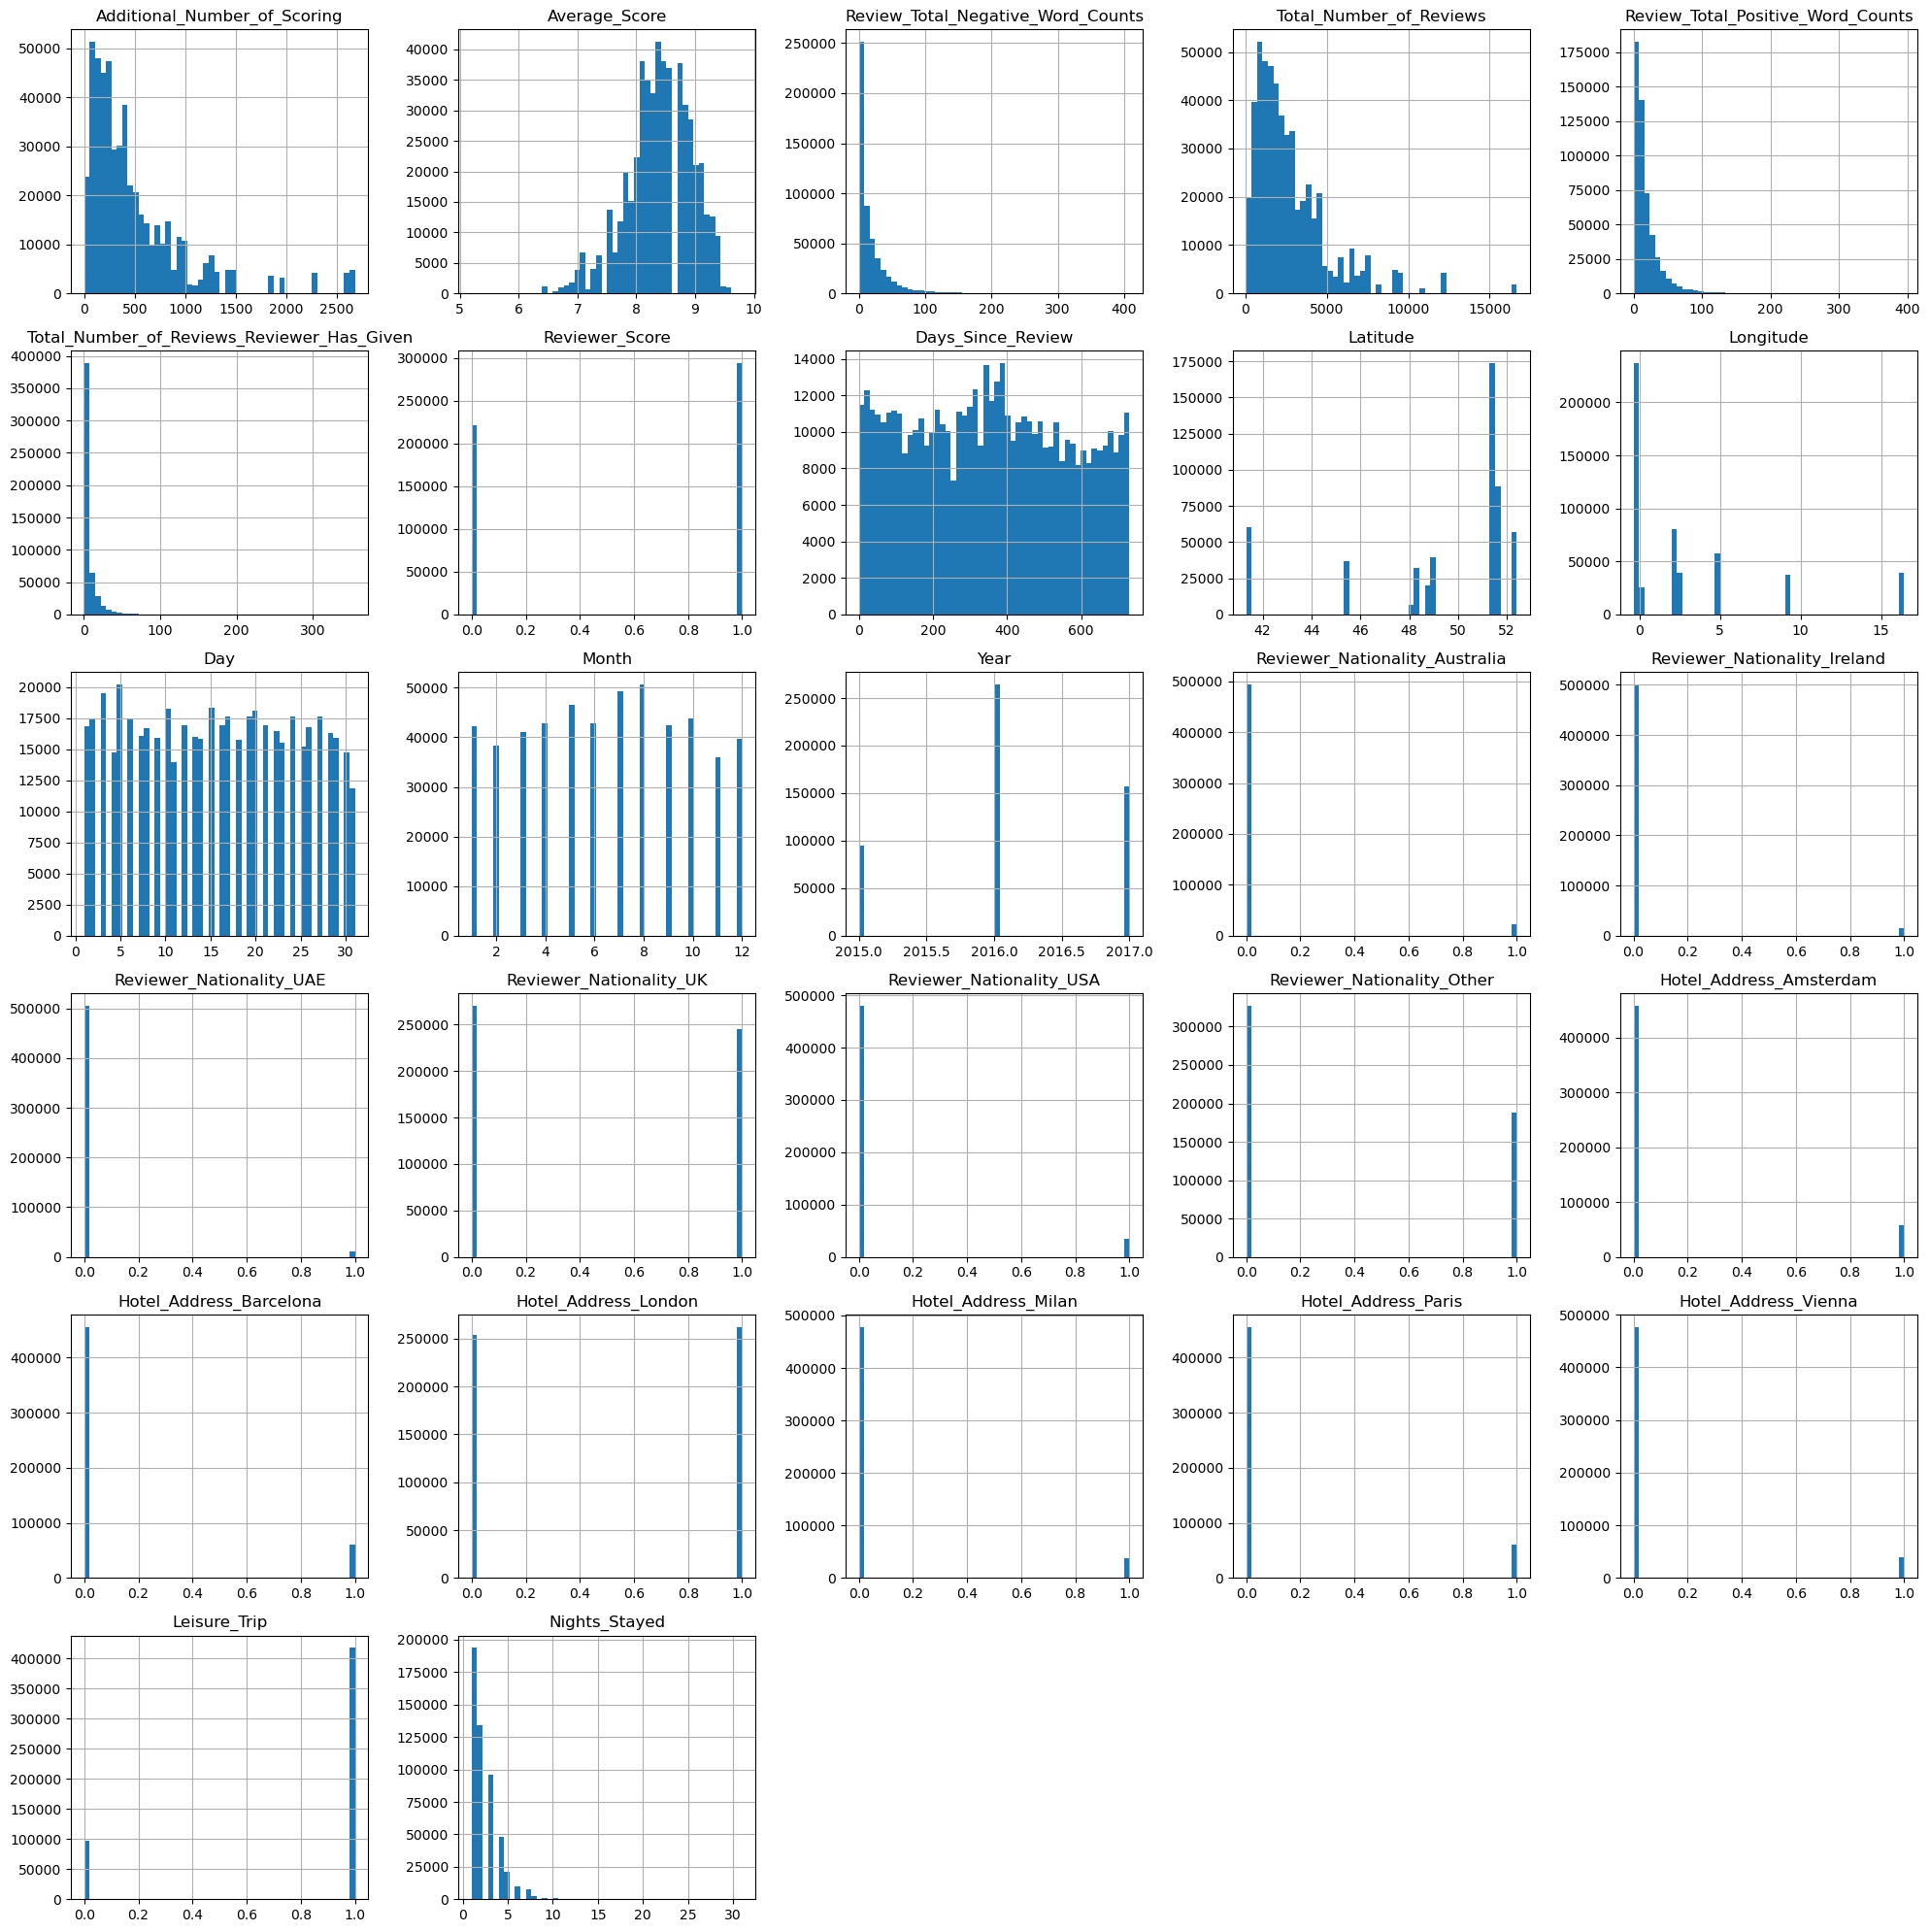

In [9]:
#Create Histograms for all the numeric columns in the dataframe

df.hist(bins=50, figsize=(20, 20))
plt.tight_layout()  
plt.show()

Next, we check for null values in the dataframe:

In [10]:
# Checking for null values 

df.isna().any()

Additional_Number_of_Scoring                  False
Average_Score                                 False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Days_Since_Review                             False
Latitude                                      False
Longitude                                     False
Day                                           False
Month                                         False
Year                                          False
Reviewer_Nationality_Australia                False
Reviewer_Nationality_Ireland                  False
Reviewer_Nationality_UAE                      False
Reviewer_Nationality_UK                       False
Reviewer_Nat

There are no null values! Let's check for duplicates

In [11]:
# Checking for duplicate columns 

#df.T.duplicated().any()

In [12]:
# Checking for duplicate rows 

df[df.duplicated()]

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
61876,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,...,0,1,0,0,1,0,0,0,1,2
68967,11,6.8,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,0,41,...,0,1,0,0,0,0,1,0,0,1
68968,11,6.8,This hotel I don t think so is 4 star B B hav...,93,165,Nothing,2,10,0,98,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445869,251,8.8,Fitness club needs more tools,6,3667,No Positive,0,34,1,358,...,0,1,0,0,0,0,0,1,1,4
470439,493,9.0,No Negative,0,4192,Excellent,2,33,1,148,...,0,1,0,0,0,1,0,0,0,1
471973,311,8.3,Nothing,2,3720,Location and staff,4,20,0,718,...,0,0,0,0,0,1,0,0,1,2
489215,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,...,0,1,0,0,0,1,0,0,1,1


In [13]:
print(f' Out of {df.shape[0]} rows, {df[df.duplicated()].shape[0]} are duplicates! \n'
      f' This equals {df[df.duplicated()].shape[0] / df.shape[0] * 100}% ')

 Out of 515738 rows, 539 are duplicates! 
 This equals 0.1045104297143123% 


Having duplicates does not make sense for reviews, so we will remove any duplicate rows

In [14]:
#Remove duplicate rows and save data in new dataframe

df_clean = df.drop_duplicates()

In [15]:
#Sanity Check
print(f' We removed {df.shape[0] - df_clean.shape[0]} rows')

df_clean[df_clean.duplicated()]
 

 We removed 539 rows


,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed


Because we will be evaluating the two text columns `Positive_Review` and `Negative_Review`, let's make sure that all the reviews in these columns only use lowercase letters.

In [16]:
# Set all spelling to lowercase on the two review columns, which are the only ones of type object

df_clean = df_clean.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'object' else x)

In [17]:
df_clean.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,i am so angry that i made this post available...,397,1403,only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,no negative,0,1403,no real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,rooms are nice but for elderly a bit difficul...,42,1403,location was good and staff were ok it is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,my room was dirty and i was afraid to walk ba...,210,1403,great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,you when i booked with your company on line y...,140,1403,amazing location and building romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


In [18]:
print(f' The cleaned dataframe has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.')

 The cleaned dataframe has 515199 rows and 29 columns.


***

[Back to top](#Top)
***

We have gathered enough insight to create a **Data dictionary**:<a class = "anchor" id = "Part-1.2"></a>

- `Additional_Number_of_Scoring` : The number of valid Scores the Hotel has, where the reviewers left a Scoring but not a written Review
- `Average_Score` : Average of the Hotel, based on data from the last year
- `Negative_Review` : The negative review given by the reviewer
- `Review_Total_Negative_Word_Counts`: Number of words in the negative review
- `Total_Number_of_Reviews` : Total number of reviews for the particular hotel
- `Positive_Review` : The positive review given by the reviewer
- `Review_Total_Positive_Word_Counts` : Number of words in positive review
- `Total_Number_of_Reviews_Reviewer_Has_Given` : The total number of reviews written by the reviewer
- `Reviewer_Score` : The score given to the Hotel by the reviewer
- `Days_Since_Review` : Number of Days since review was left
- `Latitude` : Latitude of the Hotel
- `Longitude` : Longitude of the Hotel
- `Day`: Day (Date of Review)
- `Month`: Month (Date of Review)
- `Year` : Year (Date of Review)
- `Reviewer_Nationality_Australia` : Indication of whether the Reviewer from Australia or not
- `Reviewer_Nationality_Ireland`: Indication of whether the Reviewer from Ireland or not 
- `Reviewer_Nationality_UAE`: Indication of whether the Reviewer from the UAE or not
- `Reviewer_Nationality_UK`: Indication of whether the Reviewer from the UK or not 
- `Reviewer_Nationality_USA`: Indication of whether the Reviewer from the USA or not 
- `Reviewer_Nationality_Other`: Indication of whether the Reviewer is from a country not included in the above
- `Hotel_Address_Amsterdam`: Indication of whether the reviewed Hotel is in Amsterdam 
- `Hotel_Address_Barcelona`: Indication of whether the reviewed Hotel is in Barcelona
- `Hotel_Address_London`: Indication of whether the reviewed Hotel is in London
- `Hotel_Address_Milan`: Indication of whether the reviewed Hotel is in Milan
- `Hotel_Address_Paris`: Indication of whether the reviewed Hotel is in Paris
- `Hotel_Address_Vienna`: Indication of whether the reviewed Hotel is in Vienna
- `Leisure_Trip`: Indication of whether reviewer visited the Hotel on a Leisure or on a Business trip
- `Nights_Stayed`: Number of Nights the reviewer stayed at the Hotel





***
***
***

[Back to top](#Top)

#### Data Plotting and first Insights <a class = "anchor" id = "Part-1.3"></a>


The target variable in our dataset is `Reviewer_Score`, which encodes positive sentiment as 1 and negative as 0. Let's explore the relationship of this column with some of the other columns.

In [19]:
#Group data by the Reviewer Score and calculate the averages of some other numerical columns

df_avg = df_clean.groupby('Reviewer_Score') \
[['Average_Score', \
  'Review_Total_Negative_Word_Counts', \
  'Review_Total_Positive_Word_Counts', \
  'Nights_Stayed']].mean()

df_avg.reset_index(inplace = True)

#Add a more descriptive column

df_avg['Target'] = df_avg['Reviewer_Score'].apply\
(lambda x: '0: negative sentiment' if x == 0 else '1: positive sentiment')

df_avg.head()


,Reviewer_Score,Average_Score,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Nights_Stayed,Target
0,0,8.189132,28.912043,12.772146,2.390597,0: negative sentiment
1,1,8.555110,10.719919,21.553663,2.339996,1: positive sentiment


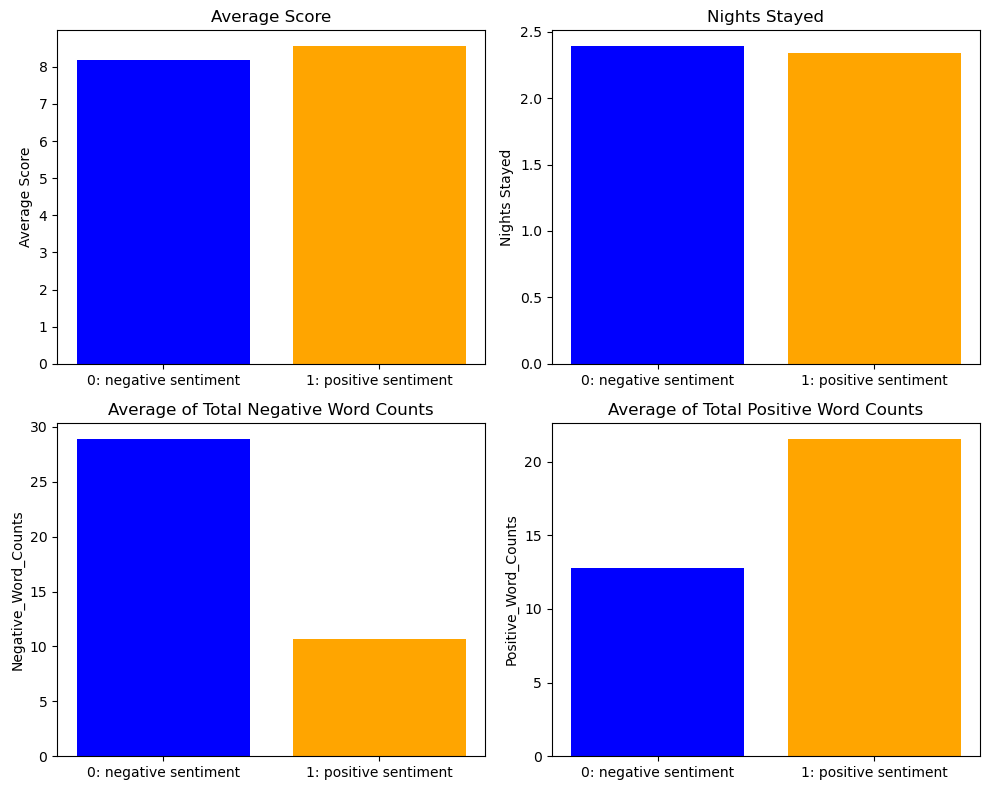

In [20]:
#plot the results

plt.subplots(2,2, figsize= (10,8))

plt.subplot(2, 2, 1)
plt.bar(df_avg['Target'],df_avg['Average_Score'], color = ['blue', 'orange'])
plt.ylabel('Average Score')

plt.title('Average Score')

#

plt.subplot(2, 2, 2)
plt.bar(df_avg['Target'],df_avg['Nights_Stayed'], color = ['blue', 'orange'])
plt.ylabel('Nights Stayed')

plt.title('Nights Stayed')


#


plt.subplot(2, 2, 3)
plt.bar(df_avg['Target'],df_avg['Review_Total_Negative_Word_Counts'], color = ['blue', 'orange'])
plt.ylabel('Negative_Word_Counts')

plt.title('Average of Total Negative Word Counts')

#

plt.subplot(2, 2, 4)
plt.bar(df_avg['Target'],df_avg['Review_Total_Positive_Word_Counts'], color = ['blue', 'orange'])
plt.ylabel('Positive_Word_Counts')

plt.title('Average of Total Positive Word Counts')

plt.tight_layout()

plt.show()

Based on these visualizations, it looks like long negative reviews would indicate negative sentiment, while long positive reviews indicate positive sentiment. We cannot draw any obvious conclusions from the overall average score and the duration of the stay.

Let's create similar plots for the categorical columns:

In [21]:
#Group data by the Reviewer Score and calculate the sums of the categorical columns

df_cat = df_clean.groupby('Reviewer_Score') \
[['Reviewer_Nationality_Australia', \
  'Reviewer_Nationality_Ireland', \
  'Reviewer_Nationality_UAE', \
  'Reviewer_Nationality_UK', \
  'Reviewer_Nationality_USA', \
  'Reviewer_Nationality_Other', \
  'Hotel_Address_Amsterdam', \
  'Hotel_Address_Barcelona', \
  'Hotel_Address_London', \
  'Hotel_Address_Milan', \
  'Hotel_Address_Paris', \
  'Hotel_Address_Vienna', \
  'Leisure_Trip']].sum()

df_cat.reset_index(inplace = True)

#Add a more descriptive column

df_cat['Target'] = df_cat['Reviewer_Score'].apply\
(lambda x: '0: negative sentiment' if x == 0 else '1: positive sentiment')

df_cat.head()


,Reviewer_Score,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Target
0,0,8419,6166,5571,99108,11049,91171,23330,23307,118287,16507,24714,15339,169308,0: negative sentiment
1,1,13229,8648,4657,145999,24300,96882,33879,36841,144006,20695,34698,23596,248039,1: positive sentiment


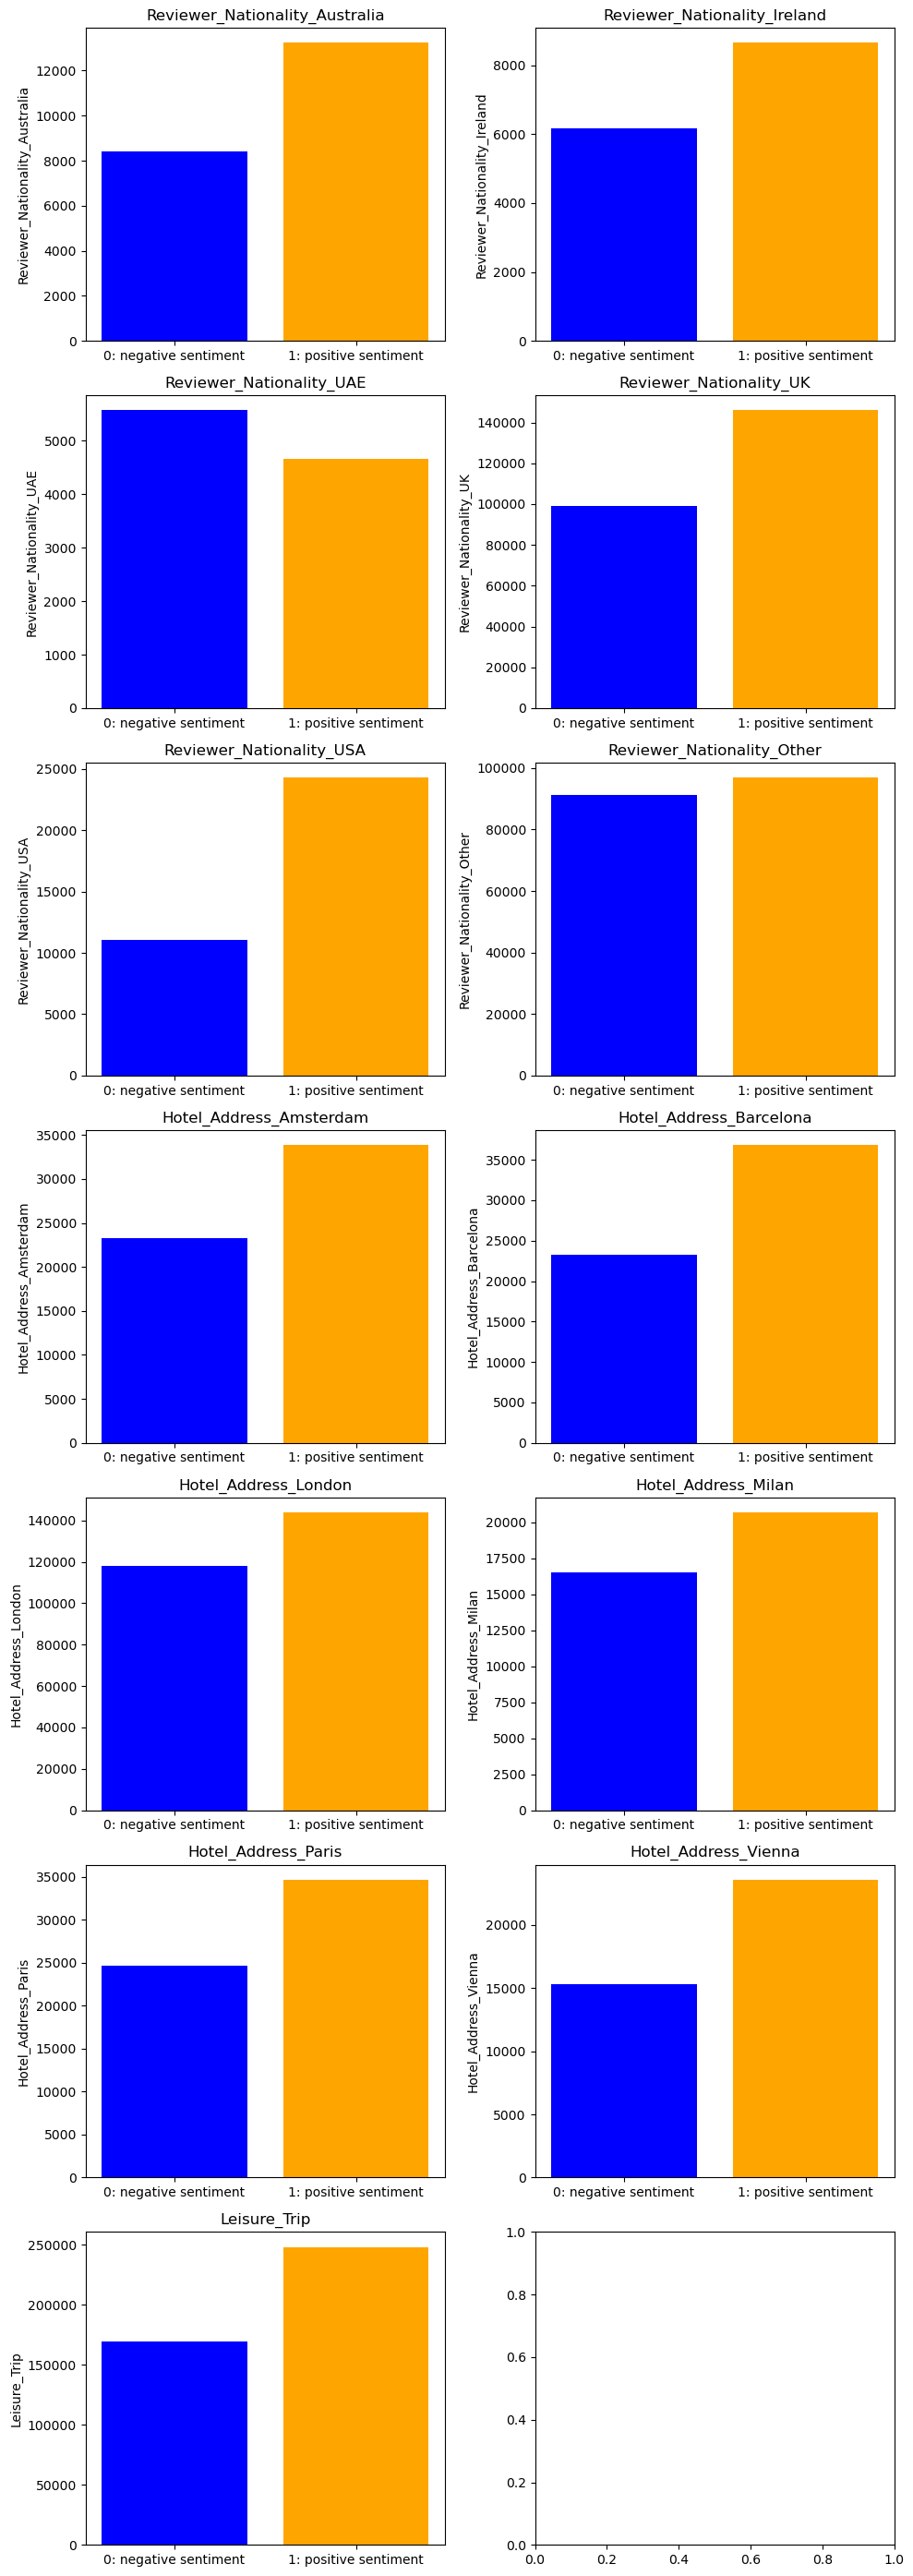

In [22]:
#plot the results

plt.subplots(7,2, figsize= (10,28))

i = 1
for column_name in df_cat.columns[1:-1]:
    plt.subplot(7, 2, i)
    plt.bar(df_cat['Target'],df_cat[column_name], color = ['blue', 'orange'])
    plt.ylabel(column_name)

    plt.title(column_name)
    i = i+ 1

plt.tight_layout()

plt.show()

Overall, the orange bar for positive sentiment seems to be higher for most of these plots. This aligns with the overall trend we saw in the histograms earlier, there seem to be more positive than negative sentiments. We have to check though if the columns are really categorical, meaning that a person can only hold a maximum of one nationality. Having multiple nationalities could be a possibility, but the hotel review should hopefully only be for one hotel location at a time.

In [23]:
#Check if a reviewer can have multiple (or no) nationalities

df_clean['Nationalities'] = df_clean['Reviewer_Nationality_Australia'] + \
  df_clean['Reviewer_Nationality_Ireland'] + \
  df_clean['Reviewer_Nationality_UAE'] + \
  df_clean['Reviewer_Nationality_UK'] + \
  df_clean['Reviewer_Nationality_USA'] + \
  df_clean['Reviewer_Nationality_Other']
   
#Return the rows where the there are more than 1 nationalities
df_clean[df_clean['Nationalities'] != 1]

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,Nationalities


The code above returned 0 rows, which means every review is written by a person with only one nationality. We will do the same check for the addresses.

In [24]:
#Check if a review is submitted about several hotel addresses
df_clean['Address'] = df_clean['Hotel_Address_Amsterdam'] + \
  df_clean['Hotel_Address_Barcelona'] + \
  df_clean['Hotel_Address_London'] + \
  df_clean['Hotel_Address_Milan'] + \
  df_clean['Hotel_Address_Paris'] + \
  df_clean['Hotel_Address_Vienna']
   
#Return the rows where the there are more than 1 addresses
df_clean[df_clean['Address'] != 1]


,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,Nationalities,Address


Again, the code returned 0 rows. We can now remove the columns we had added

In [25]:
#Drop the added columns

df_clean.drop(["Address"], axis = 1, inplace = True)
df_clean.drop(["Nationalities"], axis = 1, inplace = True)

df_clean.shape #Sanity Check

(515199, 29)

***
[Back to top](#Top)
***

#### Statistical Analysis  <a class = "anchor" id = "Part-1.4"></a>

Let's examine the relationship between the length of a review and the sentiment a bit further. In the plots above, we have seen that given our data, overall negative sentiment may have a relationship with long negative reviews. To test this assumptions, we'll perform a $\chi^2$ test to assess whether there's a statistically significant difference.

Hypothesis Test:

- $H_0$: Reviews with negative sentiment have same length of negative and positive reviews
- $H_1$: Reviews with negative sentiment have different length of reviews

In [59]:
df_test = df_avg[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']]
df_test.head()

In [61]:
stats.chi2_contingency(df_test)

Chi2ContingencyResult(statistic=8.156511178469657, pvalue=0.004290683210445042, dof=1, expected_freq=array([[22.33742581, 19.34676356],
       [17.29453646, 14.97904507]]))

The result is a p-value of 0.4%. This means we can reject the null Hypothesis and work with the assumption that the length of the review does have statistical significance (for predicting negative sentiment).

***
***
***
[Back to top](#Top)
***

### Part 2: Preprocessing <a class = "anchor" id = "Part-2"></a>

#### Train and Test Split <a class = "anchor" id = "Part-2.1"></a>

Now that the data is clean, we start by splitting the dataframe into train and test subsets for the modeling.

In [26]:
#Assign X and y variables

#All the columns but Reviewer Score will be in X
X = df_clean.drop(['Reviewer_Score'], axis=1)

# Assigning our target to y 
y = df_clean['Reviewer_Score']

# Check 
display(X)
print(y)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,i am so angry that i made this post available...,397,1403,only the park outside of the hotel was beauti...,11,7,0,52.360576,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,no negative,0,1403,no real complaints the hotel was great great ...,105,7,0,52.360576,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,rooms are nice but for elderly a bit difficul...,42,1403,location was good and staff were ok it is cut...,21,9,3,52.360576,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,my room was dirty and i was afraid to walk ba...,210,1403,great location in nice surroundings the bar a...,26,1,3,52.360576,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,you when i booked with your company on line y...,140,1403,amazing location and building romantic setting,8,3,10,52.360576,...,0,1,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,168,8.1,no trolly or staff to help you take the lugga...,14,2823,location,2,8,704,48.203745,...,0,1,0,0,0,0,0,1,1,5
515734,168,8.1,the hotel looks like 3 but surely not 4,11,2823,breakfast was ok and we got earlier check in,11,12,712,48.203745,...,0,1,0,0,0,0,0,1,1,2
515735,168,8.1,the ac was useless it was a hot week in vienn...,19,2823,no positive,0,3,715,48.203745,...,0,1,0,0,0,0,0,1,1,4
515736,168,8.1,no negative,0,2823,the rooms are enormous and really comfortable...,25,3,717,48.203745,...,0,1,0,0,0,0,0,1,1,3


0         0
1         0
2         0
3         0
4         0
         ..
515733    0
515734    0
515735    0
515736    1
515737    0
Name: Reviewer_Score, Length: 515199, dtype: int64


Now that we have our features in seperate variables, we can perform the actual split. We will use a test size of 25% of the entire dataframe and we will also use the stratify option to ensure that the imbalance of the original data (a larger number of positive than negative sentiments) is reflected after the split.

In [27]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(386399, 28) (128800, 28) (386399,) (128800,)


***

[Back to top](#Top)
***

#### Tokenization <a class = "anchor" id = "Part-2.2"></a>

We use the CountVectorizer function of skicit learn to split our text data into individual words or tokens. Because we have a positive and a negative review in each row, we have to apply this method twice. The tokenizer we are using here is the standard tokenizer.

In [28]:
# Initial Tokenization for the positive reviews

# 1. Instantiate the positive bag of words
pos_bagofwords = CountVectorizer()

# 2. Fit the positive bag of words
pos_bagofwords.fit(X_train["Positive_Review"])

# 3. Transform
pos_count_matrix_train = pos_bagofwords.transform(X_train["Positive_Review"])
pos_count_matrix_test = pos_bagofwords.transform(X_test["Positive_Review"])


# Preview the shape of the transformed matrices
print(pos_count_matrix_train.shape)
print(pos_count_matrix_test.shape)

pos_count_matrix_train

(386399, 44138)
(128800, 44138)


<386399x44138 sparse matrix of type '<class 'numpy.int64'>'
	with 5263327 stored elements in Compressed Sparse Row format>

We can see that the sparse matrix for the training data of positive reviews has 386,399 rows and 44,138 columns. This means that there are 44,138 unique terms or tokens. The test data has the same number of unique tokens.

This is a lot of data, let's have a brief look at it:

In [29]:
#Create an array of words and have a brief look.

pos_words = pos_bagofwords.get_feature_names_out()
pos_words

array(['00', '000', '001', ..., 'zzstaff', 'zzzzz', 'zzzzzxx'],
      dtype=object)

Just from the "words" printed above, we can see these would not be very useful in an analysis.

We will try to reduce the number of words. Oour goal is to have less than 500 words/tokens. In order to do this, we will the following methods:
- Remove stopwords such as "the" by using the default function of the count_vectorizer
- Use min_df to exclude any words that appear in less than 10 documents
- Use max_df to exclude any words that appear in more than 90% of documents (given we are already using the stopwords function, this does not really do much)
- Use max_features to only consider the 500 most frequent words 

However, we do not only want to consider individual words. Sometimes in a review, the combination of two words such as "friendly" + "staff" is what carries meaning. This is why we use the ngram_range function in the CountVectorizer to consider singe words and combinations of two words as one token.

In [30]:

# Tokenization for the positive reviews including using methods to limit the number of tokens

# 1. Instantiate the positive bag of words
pos_bagofwords = CountVectorizer(stop_words = "english", \
                                 ngram_range=(1, 2), \
                                 min_df = 10, \
                                 max_df = 0.9, \
                                 max_features = 500)

# 2. Fit the positive bag of words
pos_bagofwords.fit(X_train["Positive_Review"])

# 3. Transform
pos_count_matrix_train = pos_bagofwords.transform(X_train["Positive_Review"])
pos_count_matrix_test = pos_bagofwords.transform(X_test["Positive_Review"])


# Preview the shape of the transformed matrices
print(pos_count_matrix_train.shape)
print(pos_count_matrix_test.shape)

pos_count_matrix_train

(386399, 500)
(128800, 500)


<386399x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2951795 stored elements in Compressed Sparse Row format>

Let's examine what the most frequent tokens in the positive reviews look like

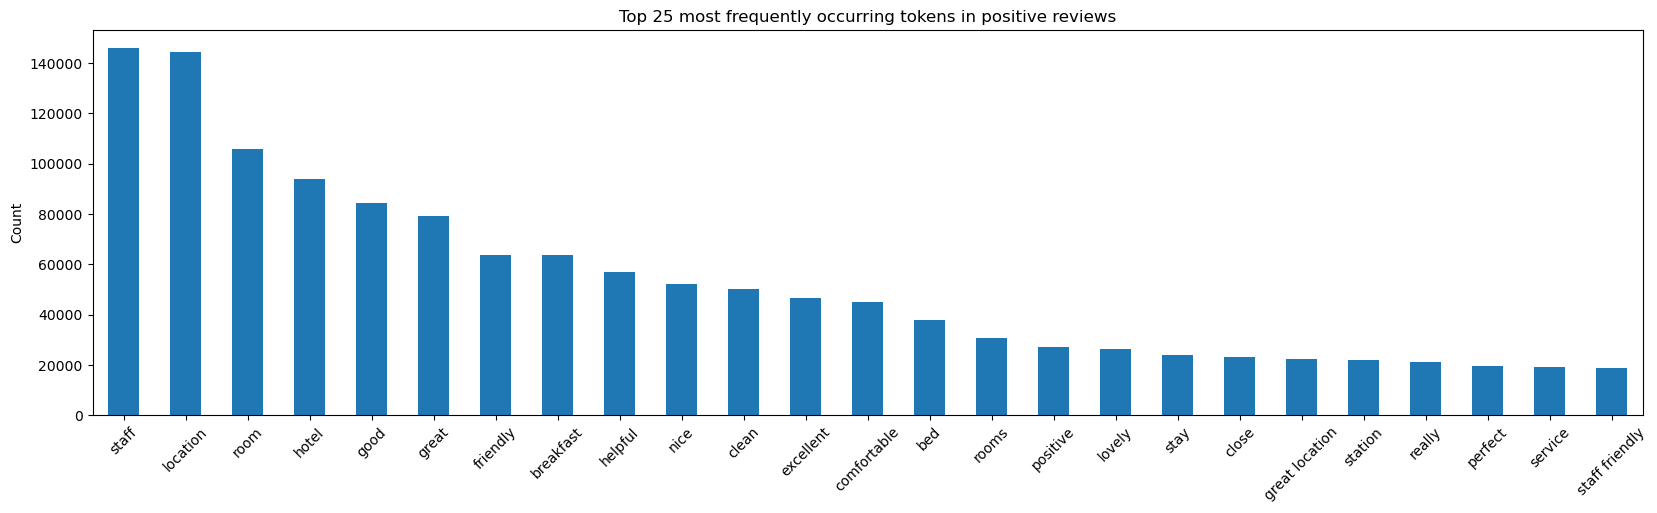

In [31]:
#Create a Pandas dataframe for the words and plot the most frequent ones

pos_word_counts = pd.DataFrame(
    {"counts": pos_count_matrix_train.toarray().sum(axis=0)},
    index=pos_bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts.head(25).plot(kind="bar", figsize=(20, 5), legend=False, color = "orange")
plt.title("Top 25 most frequently occurring tokens in positive reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Now we need to perform the same steps for the negative reviews.

(386399, 500)
(128800, 500)


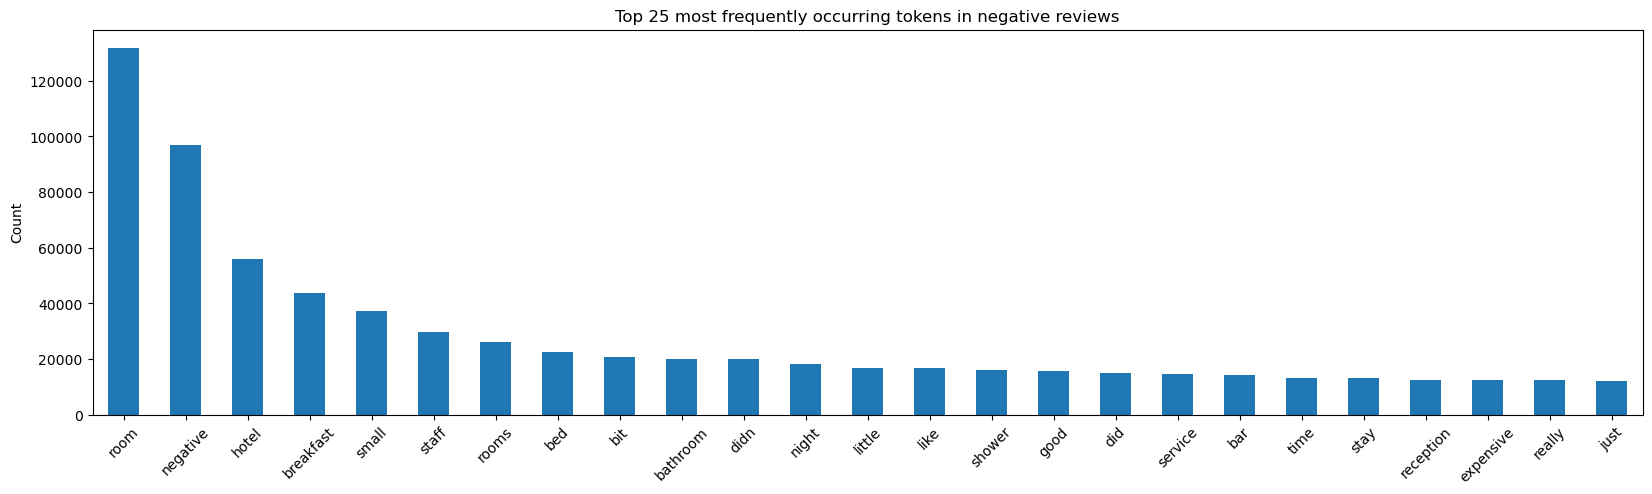

In [32]:

# Tokenization for the negative reviews including using methods to limit the number of tokens

# 1. Instantiate the negative bag of words
neg_bagofwords = CountVectorizer(stop_words = "english", \
                                 ngram_range=(1, 2), \
                                 min_df = 10, \
                                 max_df = 0.9, \
                                 max_features = 500)

# 2. Fit the negative bag of words
neg_bagofwords.fit(X_train["Negative_Review"])

# 3. Transform
neg_count_matrix_train = neg_bagofwords.transform(X_train["Negative_Review"])
neg_count_matrix_test = neg_bagofwords.transform(X_test["Negative_Review"])


# Preview the shape of the transformed matrices
print(neg_count_matrix_train.shape)
print(neg_count_matrix_test.shape)

#Create a Pandas dataframe and Display the most frequent tokens

neg_word_counts = pd.DataFrame(
    {"counts": neg_count_matrix_train.toarray().sum(axis=0)},
    index=neg_bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

neg_word_counts.head(25).plot(kind="bar", figsize=(20, 5), legend=False)
plt.title("Top 25 most frequently occurring tokens in negative reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

***
[Back to top](#Top)
***

#### Merging <a class = "anchor" id = "Part-2.3"></a>

Now that we have our positive and negative reviews tokenized, we want to add them back into the main dataframe to perform the analysis.

In [33]:
# Convert the transformed count matrices of negative reviews to DataFrames
neg_count_df_train = pd.DataFrame(neg_count_matrix_train.toarray(), columns=neg_bagofwords.get_feature_names_out())
neg_count_df_test = pd.DataFrame(neg_count_matrix_test.toarray(), columns=neg_bagofwords.get_feature_names_out())

# Add prefix 'neg_' to column names
neg_count_df_train = neg_count_df_train.add_prefix('neg_')
neg_count_df_test = neg_count_df_test.add_prefix('neg_')

# Concatenate the DataFrames with the original DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), neg_count_df_train], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), neg_count_df_test], axis=1)


In [34]:
# Convert the transformed count matrices of negative reviews to DataFrames

pos_count_df_train = pd.DataFrame(pos_count_matrix_train.toarray(), columns=pos_bagofwords.get_feature_names_out())
pos_count_df_test = pd.DataFrame(pos_count_matrix_test.toarray(), columns=pos_bagofwords.get_feature_names_out())

# Add prefix 'pos_' to column names
pos_count_df_train = pos_count_df_train.add_prefix('pos_')
pos_count_df_test = pos_count_df_test.add_prefix('pos_')

# Concatenate the DataFrames with the original DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), pos_count_df_train], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), pos_count_df_test], axis=1)


Because we want the our data to be numerical for the modelling part, we can now remove the columns that contain the full reviews in text form.

In [35]:
#Drop the review columns from the dataframes
X_train.drop(['Positive_Review', 'Negative_Review'], axis = 1, inplace = True)
X_test.drop(['Positive_Review', 'Negative_Review'], axis = 1, inplace = True)

#Sanity Check to see if the numbers of rows/columns match

print(f' X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.')
print(f' X_test has {X_train.shape[0]} rows and {X_train.shape[1]} columns.')
print(f' y_train has {len(y_train)} rows and 1 column.')
print(f' y_test has {len(y_test)} rows and 1 column.')

 X_train has 386399 rows and 1026 columns.
 X_test has 386399 rows and 1026 columns.
 y_train has 386399 rows and 1 column.
 y_test has 128800 rows and 1 column.


***
***
[Back to top](#Top)
***
***

### Part 3: Modelling <a class = "anchor" id = "Part-3"></a>

#### Scaling  <a class = "anchor" id = "Part-3.0"></a>

The data in our dataframes now has very different ranges. Some of the original data such as the nationalities of the reviewers are categorical with values being either 0 or 1, and the WordCounts and some other features have different ranges. Because a lot of columns are categorical, I will try to use the MinMax Scaler for some of the problems here.

In [36]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train) 
X_test_mm = MM.transform(X_test)

***
[Back to top](#Top)
***

#### Logistic Regression  <a class = "anchor" id = "Part-3.1"></a>

We can now finally fit our first model on the preprocessed and scaled data. For simplicity, we will work with the default C value

In [37]:
# Fitting the logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_mm, y_train)

C:\Users\rmart\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Print the Training and test score
print(f"Train score: {logreg.score(X_train_mm, y_train)}")
print(f"Test score: {logreg.score(X_test_mm, y_test)}")

Train score: 0.7907887960372568
Test score: 0.7879270186335404


This does not look bad. Let's try different C-values and a maximum iteration parameter to avoid any warnings.

In [39]:
#Perform Logistic Regression with different C-values to find an optimal one



# The C_values to try
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Empty lists to append train and test accuracy scores to 
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000 
    logreg = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model 
    logreg.fit(X_train_mm, y_train)

    # Score the model 
    train_acc_mm.append(logreg.score(X_train_mm, y_train))
    test_acc_mm.append(logreg.score(X_test_mm, y_test))


The next step is to plot the scores in order to find the best C-value

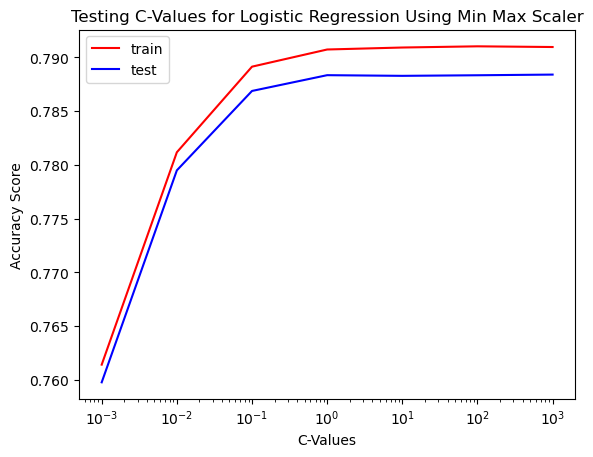

In [40]:
# visualize accuracies for different C-values

plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for Logistic Regression Using Min Max Scaler')
#plt.axvline(0.1, linestyle='--')
#plt.axvline(1, linestyle='--')
plt.legend()
plt.show()

It looks like our initial choice with a C-Value of $10^{0} = 1$ is a good fit, because that is when the curve starts to flatten. Let's run the regression again for this value and the iteration and random state parameter and then examine further

In [41]:
# Fitting the logistic regression with the determined best C-value

logreg = LogisticRegression(C=1, max_iter=1000, random_state=42)
logreg.fit(X_train_mm, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42)

In [42]:
# Print the Training and test score

print(f"Train score: {logreg.score(X_train_mm, y_train)}")
print(f"Test score: {logreg.score(X_test_mm, y_test)}")

Train score: 0.7907189200800209
Test score: 0.788330745341615


Now we can begin examining the features that led to positive or negative sentiment using the above linear regression

We will start by plotting all the top features (not just the natural language reviews) that led to positive or negative sentiment according to our model.

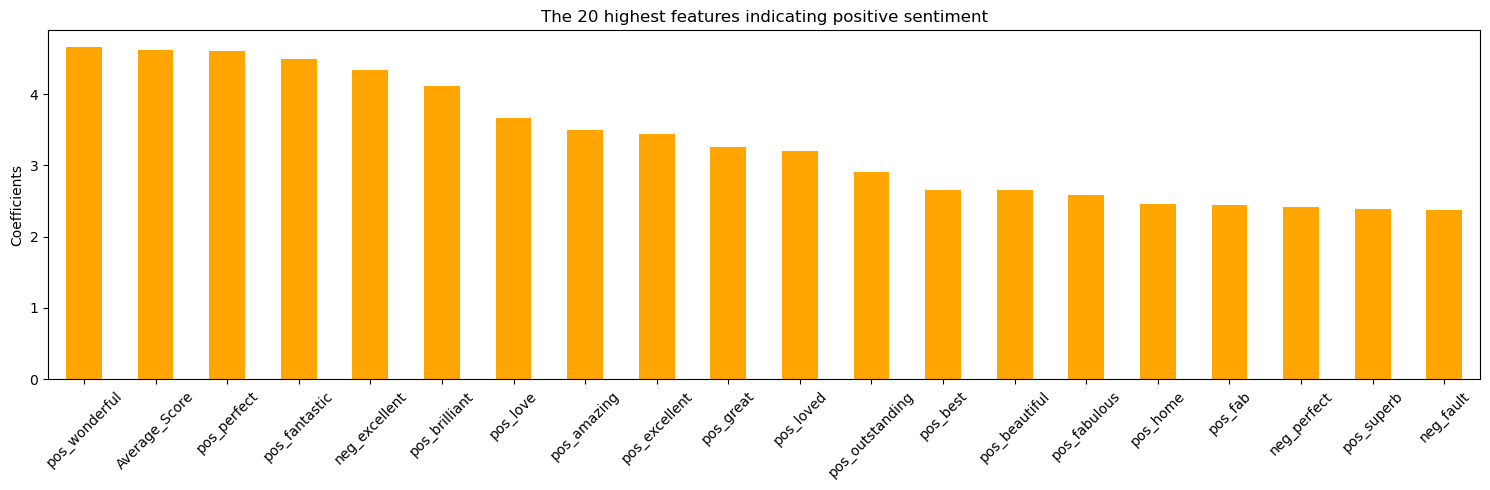

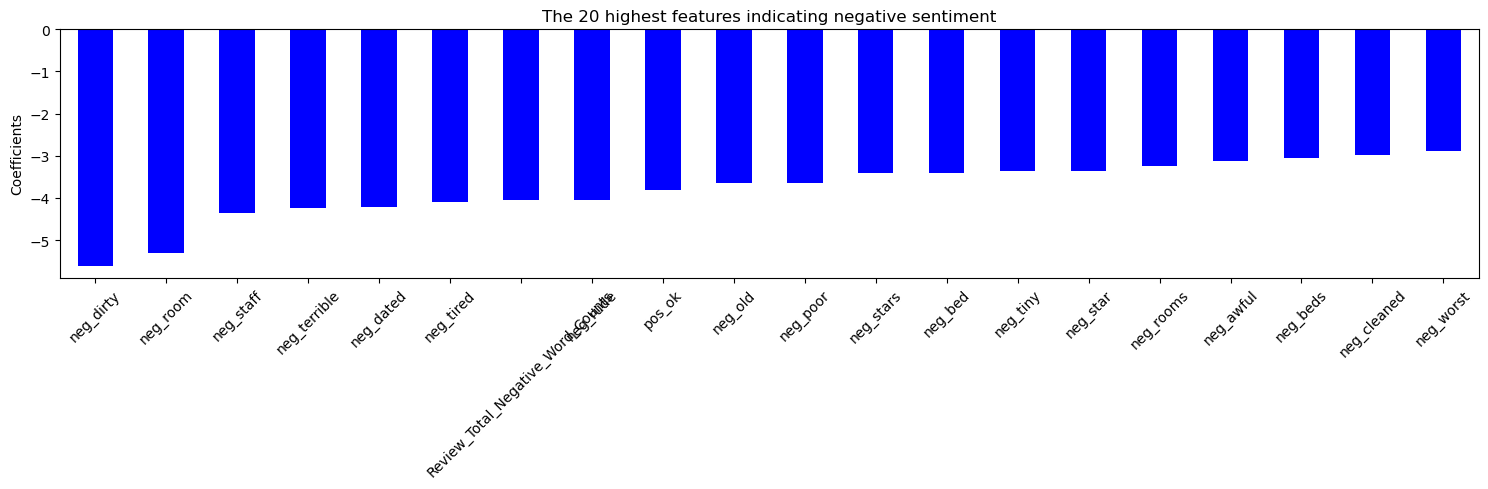

In [43]:
#Find the top 20 features  that are most predictive of a positive/negative sentiment


# Get coefficients from the logistic regression model
coefficients = logreg.coef_[0]


# Create the DataFrame with selected coefficients amd all the features from the X_test df
coef_df = pd.DataFrame(
    {"coefficients": coefficients},
    index = X_test.columns
).sort_values("coefficients", ascending=False)



#Create a plot for positive sentiment
coef_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False, color = 'orange')
plt.title("The 20 highest features indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Create a plot for negative sentiment
coef_df.sort_values("coefficients", ascending = True).head(20).plot(kind="bar", figsize=(15, 5), legend=False, color = 'blue')
plt.title("The 20 highest features indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that the tokens from the negative or positive reviews seemed to have the most influence in our model when it came to predicting the sentiment. However, both the `Average_Score` and the `Review_Total_Negative_Word_Counts` also made the top 20. This is particularly interesting because we saw in our EDA, that a long negative review may be correlated with negative sentiment.

In both of the above plots, we also see a few words from the opposite sentiment, such as the word "ok" from positive reviews appearing in the plot for predicting negative sentiment. 

In the next step, we will restrict the two plots to only contain the features from the text data:

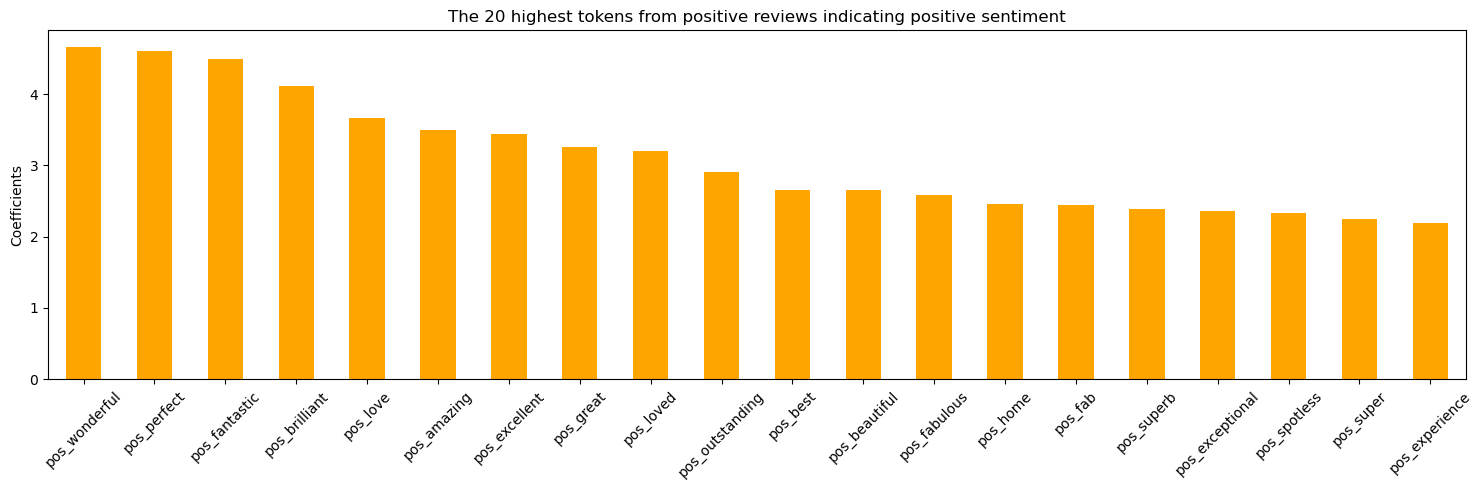

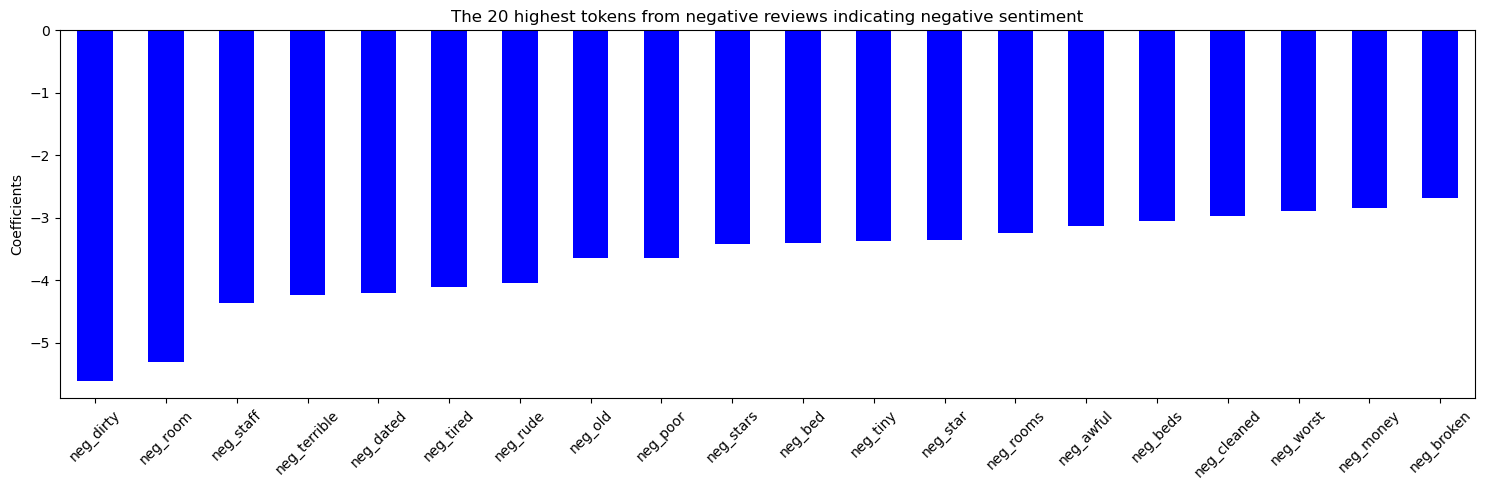

In [44]:
#Find the top 20 tokens from the positive/negative reviews that are most predictive of a positive/negative sentiment


# Filter columns that contain tokens from positive reviews
pos_coef_df = coef_df[coef_df.index.str.startswith('pos_')]

# Filter columns that contain tokens from negative reviews
neg_coef_df = coef_df[coef_df.index.str.startswith('neg_')]

#Create a plot for positive sentiment
pos_coef_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False, color = 'orange')
plt.title("The 20 highest tokens from positive reviews indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Create a plot for negative sentiment
neg_coef_df.sort_values("coefficients", ascending = True).head(20).plot(kind="bar", figsize=(15, 5), legend=False, color = 'blue')
plt.title("The 20 highest tokens from negative reviews indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first observation from the two plots is that individual words seemed to have a larger influence than tokens made up from 2 words. 

On the positive reviews, we notice that the words leading to positive sentiment are mostly adjectives which describe something positive. To a human reader, these clearly indicate positive sentiment. 

On the negative reviews, while there are adjectives indicating negative sentiment such as "dirty", we also have more nouns such as "room", "staff" or "bed". Overall, to a human reader, it is not 100% clear that these 20 words should all indicate something negative.

Conversely, we can check what words from the negative reviews may indicate positive sentiment and vice versa.

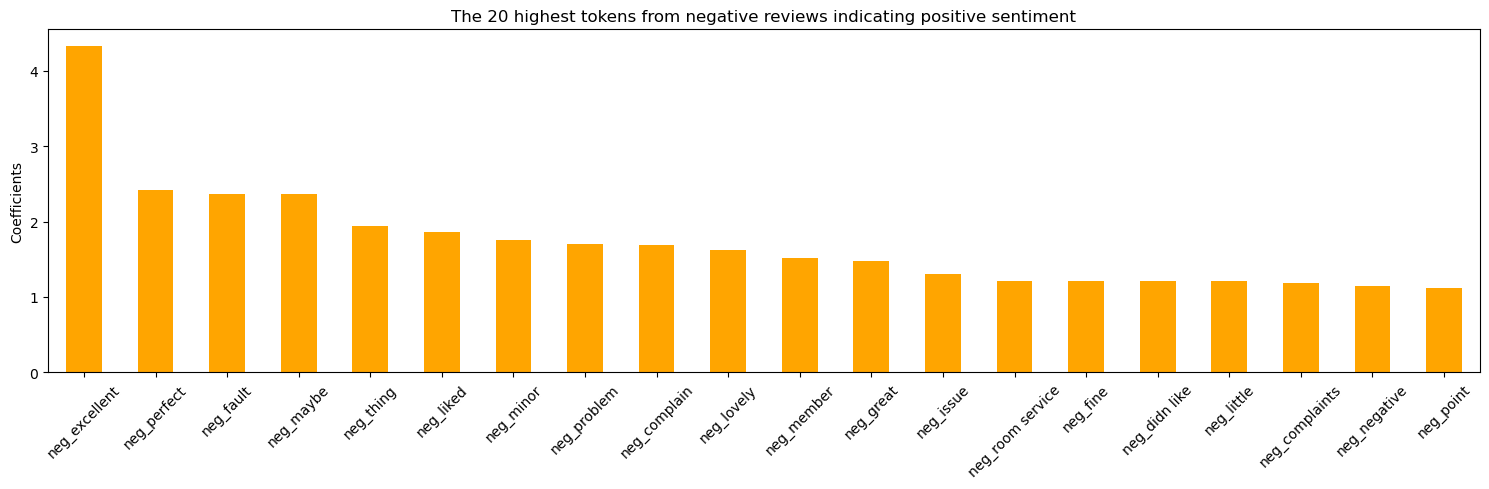

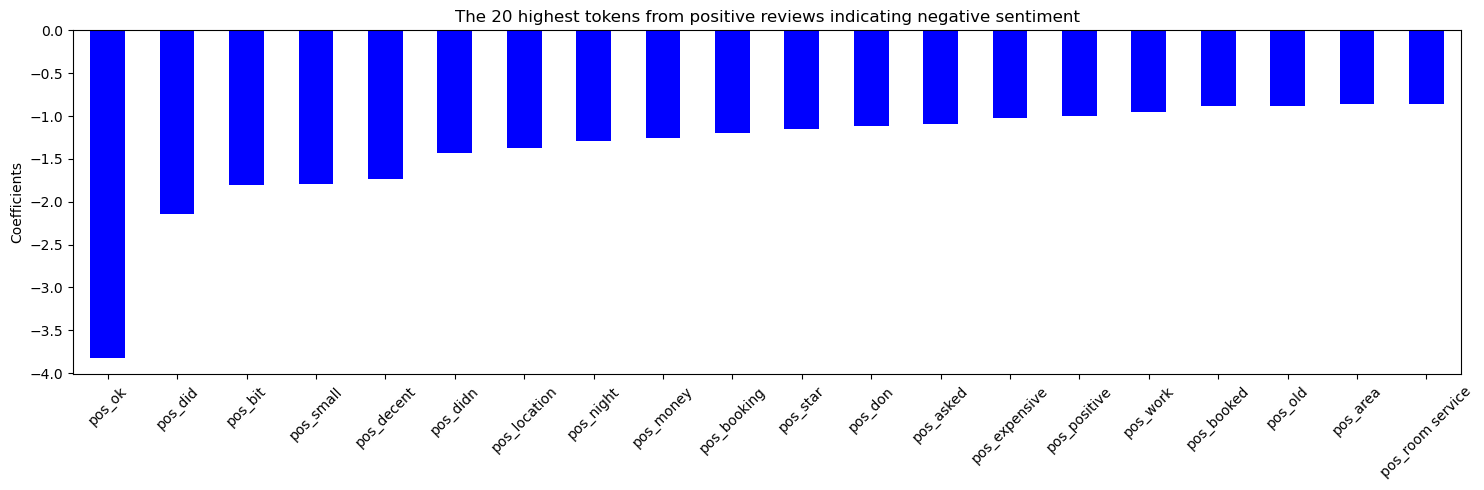

In [62]:
#Create a plot for words from negative reviews indicating positive sentiment
neg_coef_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False, color = 'orange')
plt.title("The 20 highest tokens from negative reviews indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##Create a plot for words from positive reviews indicating negative sentiment
pos_coef_df.sort_values("coefficients", ascending = True).head(20).plot(kind="bar", figsize=(15, 5), legend=False, color = 'blue')
plt.title("The 20 highest tokens from positive reviews indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These are not quite as insightful as the plots before, but see that if the negative review contained words such as "excellent" or "perfect", the model realizes these are indicators for a positive sentiment. On the other hand, "ok" is a strong indicator for negative sentiment based on the positive reviews.

***
[Back to top](#Top)
***

#### PCA and Decision Tree  <a class = "anchor" id = "Part-3.2"></a>

We will now use a different model for predicting negative/positive sentiment. Our choice of model is the **Decision Tree**. 

Instead of just initializing the model and fitting it to the data, we will also make use of a pipeline to find the best hyperparameters (from a list of parameters we provide). While there are a lot of different hyperparamers for decision trees we will be using:
- *Maximum Depth of the Decision Tree*
- *The minimum number of samples required to be at a leaf node*
- *The number of features to consider when looking for the best split*

Adiddtionally, we are using **PCA (Principal Component Analysis)** to reduce the number of dimensions of the data and therefore prevent overfitting, while hopefully also reducing the runtime. In this computation, we will be using 20 Principal Components as a fixed value.

In order to be able to optimize the hyperparamets for the Decision Tree Model, we will feed our settings for the Decision Tree and for the PCA into a *Machine Learning Pipeline*, which will perform our steps in the order we specified. The goal is to find the optimal parameters and to do that, we use another functionality called GridSearchCV which will divide our Data into 5 "folds". This ensures different subsets will be used for training an testing. The resulting Cross-Validation Score can then be described as the average of the Scores obtained by the 5 folds.


In [45]:
# Define the pipeline with preprocessing steps and the model

start = time.time()

#Define the inputs for the pipeline
estimators = [('normalise', MinMaxScaler()),
              ('reduce_dim', PCA(n_components=20)),
              ('model', DecisionTreeClassifier())]
pipe = Pipeline(estimators)

# Define the parameter grid for hyperparameter tuning
params = {
    'model__max_depth': [3, 5, 8], 
          'model__min_samples_leaf': [0.001, 0.01, 0.2],
          'model__max_features': [100, 250, 300]
}  

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)  

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Runtime: 3332.61 seconds
Best Hyperparameters: {'model__max_depth': 8, 'model__max_features': 100, 'model__min_samples_leaf': 0.001}
Best Cross-Validation Score: 0.7149086873174467


According to the Outcome of the pipe and the cross-validation, the best model used the following hyperparameters:
- A maximum depth of 8
- A maximum of 100 features
- A minimum of 0.1% of total features for samples at a leaf node

*Note: I am relatively certain that increasing the maximum depth would have led to an even better score. However, running the above code already took considerable time and having more tree layers probably would have increased the runtime even more.*

Let's recreate the model so we can use it for further evaluation

In [49]:
#Using the results from above, Instantiate and fit a new Decision Tree model

# Instantiate
DT = DecisionTreeClassifier(max_depth = 8, max_features = 100, min_samples_leaf = 0.001)

# Fit on the scaled data
DT.fit(X_train_mm, y_train)

# Score the model 
DT_train_score = DT.score(X_train_mm, y_train)
DT_test_score = DT.score(X_test_mm, y_test)

print(f' The model has a train accuracy of \
{DT_train_score} and a test accuracy of {DT_test_score}.')

 The model has a train accuracy of 0.710369333253968 and a test accuracy of 0.7081909937888199.


Our decision tree actually performs worse than the logistic regression! However, we can see that training score and test score are pretty similar, so we have successfully prevented overfitting the model.

We can look at the  (first) features that were used in determining the splits of the tree:

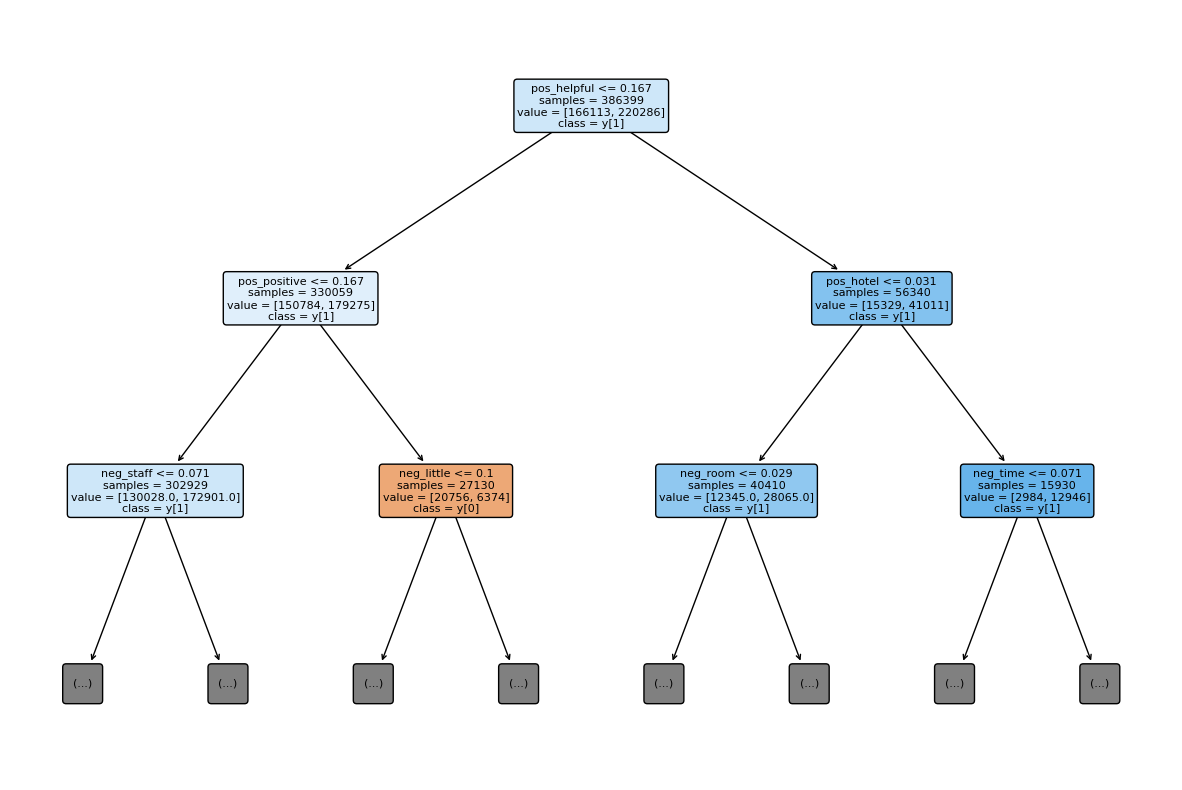

In [56]:
#Plot the first layers of the decision tree

plt.figure(figsize = (15,10))

plot_tree(DT, 
          max_depth = 2,
          feature_names=X_train.columns,
          class_names = True,
          rounded=True,
          impurity=False,
          filled=True,
         fontsize = 8)

plt.show()

Similar to the regression Model, we can see that the Decision tree used the natural language data to predict outcomes, instead of focusing on the other numerical features in the dataframe.

***
***
[Back to top](#Top)
***
***

### Part 4: Model Evaluation  <a class = "anchor" id = "Part-4"></a>

The model that has performed best in this notebook is the logistic regression model. We will now take a closer look at the predictions made by this model.

In [86]:
#Create and display a confusion matrix for our logistic regression model based on the scaled data

# Get class predictions using the scaled 
y_pred = logreg.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Sentiment", "Predicted Positive Sentiment"],
    index=["True Negative Sentiment", "True Positive Sentiment"]
)

display(cf_df)

,Predicted Negative Sentiment,Predicted Positive Sentiment
True Negative Sentiment,39915,15456
True Positive Sentiment,11807,61622


We can see that overall the numbers on the diagonal are higher, which means our model seems to have performed pretty well, but we can analyze these in more detail. We can start by creating a heatmap.

Text(0.5, 1.0, 'Confusion Matrix for the Logistic Regression Model')

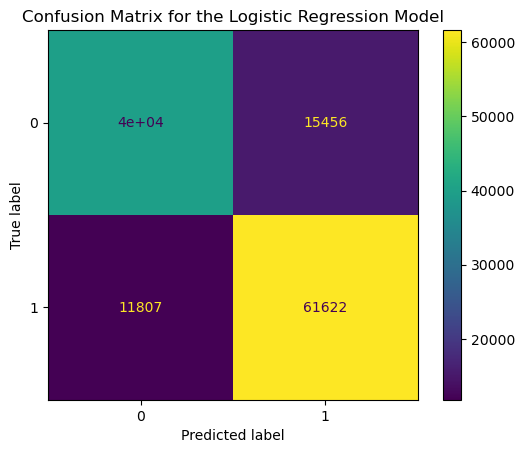

In [87]:

disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()
plt.title("Confusion Matrix for the Logistic Regression Model")


The heatmap shows what we already gathered before. We did not make a lot of "false predictions", compared to the amount of accurate predictions.

We can now calculate Accuracy, Precision and Recall based on our example. Remember that

$$Accuracy = \frac{\text{# correct predictions}}{\text{# all predictions}}= \frac{TN+TP}{TN+FP+FN+TP}$$

$$Precision = \frac{TP}{TP+FP}$$

$$Recall = \frac{TP}{TP+FN}$$

In [91]:
#Calculate accuracy, precision and recall

acc = (39915 + 61622) / (39915 + 15456 + 11807 + 61622)


prec= 61622 / (61622 + 15456)


rec = 61622 / (61622 + 11807)

print(f' The  model has an accuracy of {acc}.'\
f'It has a Precision value of {prec} and a recall value of {rec}')

 The  model has an accuracy of 0.788330745341615.It has a Precision value of 0.7994758556267677 and a recall value of 0.8392052186465838


The accuracy coincides with the score we saw earlier when we first ran the logistic regression model.

The values for precision and recall (and accuracy) are all pretty similar. The precision value means that about 80% of the reviews which we classified as having positive sentiment are actually positive, while the recall value tells us that we classified about missed about 16% of reviews which should have been classified as positive.

We can also look at the F1 score:

$$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [96]:
#Calculate and print the F1 score

print(f' The F1 score is {(prec * rec / (prec + rec)) * 2}.')

 The F1 score is 0.818858923505219.


Given that all our scores are at around 80%, I think this regression model performed well on the Hotel Dataset and is skilled at predicting positive or negative Sentiment.